# Ejercicio 1

# Imports

In [ ]:
#Importar librerías necesarias para desarrollar el análisis
import importlib

import pandas as pd
import numpy as np
import sklearn 
from sklearn.metrics import mean_squared_error, auc, log_loss, roc_auc_score, accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score, make_scorer
import random as python_random
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.stats import ks_2samp
import scorecardpy as sc
#import openpyxl

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.feature_selection import SelectKBest, chi2, RFE, mutual_info_classif
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline, Pipeline 
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc, log_loss, roc_auc_score, accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score, make_scorer

from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

from xgboost import XGBClassifier
from xgboost import XGBRegressor
import xgboost

import sys
import notebook
import jupyterlab

import os
from pathlib import Path

from utils.data_cleaning import clean_canal_entrada

/Users/cristian/Documents/GitHub/adeslas-interview/.venv/lib/python3.13/site-packages/scorecardpy/germancredit.py:5: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
from dotenv import load_dotenv, find_dotenv
# Carga el .env más cercano hacia arriba en el árbol
load_dotenv(find_dotenv())

# Raíz del proyecto = carpeta que contiene el .env
PROJECT_ROOT = Path(find_dotenv()).parent

# DATA_PATH puede ser relativo (./data) o absoluto; aquí lo resolvemos desde el root
DATA_PATH = (PROJECT_ROOT / os.environ.get("DATA_PATH", "data")).resolve()

In [3]:
import sys, platform
print(sys.executable)
print(platform.python_version())

/Users/cristian/Documents/GitHub/adeslas-interview/.venv/bin/python
3.13.7


In [4]:
pd.set_option("display.max_columns", None)   # muestra todas las columnas
pd.set_option("display.width", 0)            # usa el ancho de la celda de Jupyter
pd.set_option("display.max_colwidth", None)  # no truncar el contenido de celdas

# Env

In [5]:
var_target = 'anula'

# Funciones

# Load data

In [6]:
PROJ_ROOT = Path.cwd().parent 
sys.path.insert(0, str(PROJ_ROOT / "src"))


# Verifica
print("Añadido a sys.path:", sys.path[0])

from utils.data_cleaning import clean_canal_entrada

Añadido a sys.path: /Users/cristian/Documents/GitHub/adeslas-interview/src


In [7]:
DATA_PATH = Path(os.environ["DATA_PATH"])

In [8]:
# Anulaciones
file_tab = DATA_PATH / "BBDD_anulaciones.tab"
df_anulaciones = pd.read_csv(file_tab, sep="\t", encoding="latin1")
print(df_anulaciones.shape)
df_anulaciones.head()


(50000, 21)


,id_poliza,anula,edad_cliente,cia_procedencia,antig_cliente,garantia_ampliada,canal_entrada,prima,profesion,VC,antiguedad_vehiculo,pvp_vehiculo,siniestros_ultimo_anyo,Polizas_AUTO,Importe_siniestros,admite_publi,id_agente_gestor,tipo_pago,CV_coche,Gestion_multas,codigo_zona
0,1,0,27.4,Ocaso,0.00,Vehiculo sustitucion,NaN,90.30,Transporte de mercan,NaN,4,10457.084954,0,0,0.000000,Si,24,Mensual,47.0,N,483.0
1,2,0,24.9,Mutua Madrileña,4.49,Vehiculo sustitucion,Oficina Adeslas,194.06,Transporte de mercan,NaN,5,12078.987975,1,0,268.834435,Si,21,Anual,61.0,N,832.0
2,3,0,37.4,Liberty,0.00,Vehiculo sustitucion,Oficina Adeslas,186.04,Desconocido,NaN,10,7049.969489,1,1,2.504393,.,17,Mensual,112.0,N,256.0
3,4,0,19.8,Mutua Madrileña,8.45,Vehiculo sustitucion,Telefonico,128.71,Logistica,NaN,7,7097.456241,1,3,60.670131,.,90,Anual,104.0,N,627.0
4,5,0,35.6,Ocaso,NaN,Vehiculo sustitucion,Telefonico,357.16,Estudiante,NaN,5,24563.357655,0,3,0.000000,No,72,Anual,NaN,N,654.0


In [9]:
# Sociodemográfica
file_tab = DATA_PATH / "BBDD_extra.tab"
df_sociodemo= pd.read_csv(file_tab, sep="\t", encoding="latin1")

print(df_sociodemo.shape)
df_sociodemo.head()

(297, 400)


,codigo_zona,NUM_FAMILIAS,NUM_PERSONAS,NUM_PERSONAS_POR_FAMILIA,CAPITAL_PROVINCIA,TAMANO_MUNICIPIO,SUPERFICIE,DENSIDAD_POBLACION,ROOMMATES_PCT,ROOMMATES_TOTAL,SINGLE_JOVEN_PCT,SINGLE_JOVEN_TOTAL,SINGLE_ADULTO_PCT,SINGLE_ADULTO_TOTAL,PAREJA_JOVEN_PCT,PAREJA_JOVEN_TOTAL,PAREJA_ADULTA_PCT,PAREJA_ADULTA_TOTAL,FAMILIA_MONOPARENTAL_PCT,FAMILIA_MONOPARENTAL_TOTAL,NIDO_LLENO_PEQ_PCT,NIDO_LLENO_PEQ_TOTAL,NIDO_LLENO_JOV_PCT,NIDO_LLENO_JOV_TOTAL,NIDO_LLENO_MIX_PCT,NIDO_LLENO_MIX_TOTAL,NIDO_MULTINUCLEAR_PCT,NIDO_MULTINUCLEAR_TOTAL,ABUELOS_PCT,ABUELOS_TOTAL,JUBILADO_PCT,JUBILADO_TOTAL,PAREJA_JUBILADOS_PCT,PAREJA_JUBILADOS_TOTAL,INGRESOS_MES_NETOS_FAM,INGRESOS_ANUAL_NETOS_FAM,INGRESOS_MES_NETOS_PERS,INGRESOS_ANUAL_NETOS_PERS,INGRESOS_MES_FAM_ACTIVAS,ING_FAM_ACTIVAS_POR_OCUPADO,ING_FAM_ACTIVAS_POR_MIEMBRO,INGRESOS_MES_FAM_JUBILADOS,PCT_FAM_ING_INFERIOR_A_1389,PCT_FAM_ING_ENTRE_1389_Y_1641,PCT_FAM_ING_ENTRE_1641_Y_2122,PCT_FAM_ING_ENTRE_2122_Y_2589,PCT_FAM_ING_SUPERIOR_A_2589,INGRESOS_NETOS_MES_P5,INGRESOS_NETOS_MES_P10,INGRESOS_NETOS_MES_P15,INGRESOS_NETOS_MES_P20,INGRESOS_NETOS_MES_P25,INGRESOS_NETOS_MES_P30,INGRESOS_NETOS_MES_P35,INGRESOS_NETOS_MES_P40,INGRESOS_NETOS_MES_P45,INGRESOS_NETOS_MES_P50,INGRESOS_NETOS_MES_P55,INGRESOS_NETOS_MES_P60,INGRESOS_NETOS_MES_P65,INGRESOS_NETOS_MES_P70,INGRESOS_NETOS_MES_P75,INGRESOS_NETOS_MES_P80,INGRESOS_NETOS_MES_P85,INGRESOS_NETOS_MES_P90,INGRESOS_NETOS_MES_P95,RENTA_BRUTA_HOGAR,RENTA_DISP_HOGAR,RENTA_DISP_HOGAR_INCL_PREST,RENTA_DISP_HOGAR_INCL_ALQ,RENTA_DISP_HOGAR_INCL_PENS_PRIV,RENTA_NETA_ALQUILER_PROPIEDAD,RENTA_BRUTA_ALQUILER_PROPIEDAD,RENTA_NETA_MENORES_16,RENTA_BRUTA_MENORES_16,CUOTA_HIPOTECA_MES,IMPUESTO_SOBRE_PATRIMONIO,AYUDA_NETA_FAMILIA_E_HIJOS,AYUDA_BRUTA_FAMILIA_E_HIJOS,AYUDA_NETA_VIVIENDA,INGRESOS_NETOS_ASIST_SOCIAL,INGRESOS_BRUTOS_ASIST_SOCIAL,TRANSF_PERC_OH_NETAS,TRANSF_PERC_OH_PENSION,TRANSF_ABON_OH_NETAS,TRANSF_ABON_OH_BRUTAS,TRANSF_ABON_OH_PENSION,TRANSF_ABON_OH_PENS_BRUTAS,INT_DIV_Y_GANANCIAS_NETAS,INT_DIV_Y_GANANCIAS_BRUTAS,INT_PAGADOS_PRESTAMO_NETOS,TOTAL_GASTOS_FAMILIARES,TOTAL_VIVIENDA_Y_SUMINISTROS,TOTAL_ALQULERES_VIVIENDA,TOTAL_ALQUILERES_VIV_PPAL,TOTAL_OTROS_ALQUILERES,OTROS_ALQUILERES_NO_VAC_O_ENSEN,OTROS_ALQ_ENSENANZA,ALQUILERES_GARAJE_VIV_PPAL,ALQUILERES_GARAJE_OTRAS_VIV,OTROS_ALQUILERES,TOTAL_ALQ_IMPUT_VIVIENDA,TOTAL_ALQ_IMPUT_VIV_PPAL,TOTAL_OTROS_ALQ_IMPUT,ALQ_IMPUT_OTRAS_VIV,ALQ_IMPUT_VIV_PPAL_CEDIDA,ALQ_IMPUT_OTRAS_VIV_CEDIDAS,TOTAL_GASTOS_MANT_Y_REP_VIV,MATERIALES_MANT_Y_REP_VIV,TOTAL_SERV_MANT_Y_REP_VIV,SERV_FONTANERIA,SERV_ELECTRICIDAD,SERV_MANT_SIST_CALEFACCION,SERV_PINTURA,SERV_CARPINTERIA,SERV_ALBANILERIA,SERV_SUMINISTROS_AGUA_Y_OTROS,TOTAL_SUMINISTRO_AGUA,SUMINISTRO_AGUA_VIV_PPAL,SUMINISTRO_AGUA_OTRAS_VIV,TOTAL_SERV_RECOGIDA_BASURA,SERV_REC_BASURA_VIV_PPAL,SERV_REC_BASURA_OTRAS_VIV,TOTAL_SERV_SANEAMIENTO,SERV_SANEAMIENTO_VIV_PPAL,SERV_SANEAMIENTO_OTRAS_VIV,TOTAL_OTROS_SERV_REL_VIV,GASTOS_COMUNITARIOS_VIV_PPAL,GASTOS_COMUNITARIOS_OTRAS_VIV,SERV_SEGURIDAD_VIV_PPAL,SERV_SEGURIDAD_OTRAS_VIV,OTROS_SERV_REL_VIV_PPAL,OTROS_SERV_REL_OTRAS_VIV,TOTAL_ELECTR_GAS_Y_OTROS_COMB,TOTAL_ELECTRICIDAD,ELECTRICIDAD_VIV_PPAL,ELECTRICIDAD_OTRAS_VIV,TOTAL_GAS,GAS_CIUDAD_Y_NATURAL_VIV_PPAL,GAS_CIUDAD_Y_NATURAL_OTRAS_VIV,GAS_LICUADO_VIV_PPAL,GAS_LICUADO_OTRAS_VIV,TOTAL_COMBUSTIBLES_LIQUIDOS,COMBUSTIBLES_LIQUIDOS_VIV_PPAL,COMBUSTIBLES_LIQUIDOS_OTRAS_VIV,TOTAL_COMBUSTIBLE_SOLIDOS,CARBON_VIV_PPAL,CARBON_OTRAS_VIV,OTROS_COMB_SOLIDOS_VIV_PPAL,OTROS_COMB_SOLIDOS_OTRAS_VIV,TOTAL_SALUD,TOTAL_PROD_FARMA_Y_APARAT_TERAP,TOTAL_PROD_FARMACEUTICOS,PRODUCTOS_FARMACEUTICOS,PRODUCTOS_HOMEOPATICOS,TOTAL_OTROS_PROD_MEDICOS,PRUEBA_EMBARAZO_Y_ANTICONCEP,OTROS_PRODUCTOS_MEDICOS,TOTAL_OTROS_APARAT_Y_MAT_TERAP,GAFAS_GRAD_Y_LENTES_CONTACTO,AUDIFONOS,REPARACION_APARAT_Y_MAT_TERAP,OTROS_APARAT_Y_MAT_TERAP,TOTAL_SERV_MEDIC_Y_PARAMED_AMBU,TOTAL_SERV_MEDIC_AMBULAT,MED_GENERAL_Y_PEDIATRIA_AMBU,MED_ESPECIALISTA_AMBU,TOTAL_SERV_DENTALES,TOTAL_SERV_PARAMEDIC_AMBU,SERV_ANAL_CLINIC_Y_DIAGNOS,SERV_REHABILIT_ALQ_EQUIPO_TER

In [10]:
## Causas anulaciones - GenAI
#file_tab = DATA_PATH / "BBDD_CAUSAS_SINIESTROS_TRAIN.csv"
#df_causas_siniestros = pd.read_csv(file_tab, sep=";", encoding="latin1")
#df_causas_siniestros.head()

# EDA

## Sociodemografica

In [11]:
#Número de filas y columnas
print("\ndimensiones: ",df_sociodemo.shape)

#Visualización inicial
display(df_sociodemo.head())

#Descripción básica
display(df_sociodemo.describe())
display(df_sociodemo.dtypes)

# Seleccionar columnas numéricas
numeric_columns = df_sociodemo.select_dtypes(include=['number']).columns.tolist()
print("\nColumnas numéricas:")
display(numeric_columns)

# Seleccionar columnas no numéricas
non_numeric_columns = df_sociodemo.select_dtypes(exclude=['number']).columns.tolist()
print("\nColumnas no numéricas:")
display(non_numeric_columns)




dimensiones:  (297, 400)


,codigo_zona,NUM_FAMILIAS,NUM_PERSONAS,NUM_PERSONAS_POR_FAMILIA,CAPITAL_PROVINCIA,TAMANO_MUNICIPIO,SUPERFICIE,DENSIDAD_POBLACION,ROOMMATES_PCT,ROOMMATES_TOTAL,SINGLE_JOVEN_PCT,SINGLE_JOVEN_TOTAL,SINGLE_ADULTO_PCT,SINGLE_ADULTO_TOTAL,PAREJA_JOVEN_PCT,PAREJA_JOVEN_TOTAL,PAREJA_ADULTA_PCT,PAREJA_ADULTA_TOTAL,FAMILIA_MONOPARENTAL_PCT,FAMILIA_MONOPARENTAL_TOTAL,NIDO_LLENO_PEQ_PCT,NIDO_LLENO_PEQ_TOTAL,NIDO_LLENO_JOV_PCT,NIDO_LLENO_JOV_TOTAL,NIDO_LLENO_MIX_PCT,NIDO_LLENO_MIX_TOTAL,NIDO_MULTINUCLEAR_PCT,NIDO_MULTINUCLEAR_TOTAL,ABUELOS_PCT,ABUELOS_TOTAL,JUBILADO_PCT,JUBILADO_TOTAL,PAREJA_JUBILADOS_PCT,PAREJA_JUBILADOS_TOTAL,INGRESOS_MES_NETOS_FAM,INGRESOS_ANUAL_NETOS_FAM,INGRESOS_MES_NETOS_PERS,INGRESOS_ANUAL_NETOS_PERS,INGRESOS_MES_FAM_ACTIVAS,ING_FAM_ACTIVAS_POR_OCUPADO,ING_FAM_ACTIVAS_POR_MIEMBRO,INGRESOS_MES_FAM_JUBILADOS,PCT_FAM_ING_INFERIOR_A_1389,PCT_FAM_ING_ENTRE_1389_Y_1641,PCT_FAM_ING_ENTRE_1641_Y_2122,PCT_FAM_ING_ENTRE_2122_Y_2589,PCT_FAM_ING_SUPERIOR_A_2589,INGRESOS_NETOS_MES_P5,INGRESOS_NETOS_MES_P10,INGRESOS_NETOS_MES_P15,INGRESOS_NETOS_MES_P20,INGRESOS_NETOS_MES_P25,INGRESOS_NETOS_MES_P30,INGRESOS_NETOS_MES_P35,INGRESOS_NETOS_MES_P40,INGRESOS_NETOS_MES_P45,INGRESOS_NETOS_MES_P50,INGRESOS_NETOS_MES_P55,INGRESOS_NETOS_MES_P60,INGRESOS_NETOS_MES_P65,INGRESOS_NETOS_MES_P70,INGRESOS_NETOS_MES_P75,INGRESOS_NETOS_MES_P80,INGRESOS_NETOS_MES_P85,INGRESOS_NETOS_MES_P90,INGRESOS_NETOS_MES_P95,RENTA_BRUTA_HOGAR,RENTA_DISP_HOGAR,RENTA_DISP_HOGAR_INCL_PREST,RENTA_DISP_HOGAR_INCL_ALQ,RENTA_DISP_HOGAR_INCL_PENS_PRIV,RENTA_NETA_ALQUILER_PROPIEDAD,RENTA_BRUTA_ALQUILER_PROPIEDAD,RENTA_NETA_MENORES_16,RENTA_BRUTA_MENORES_16,CUOTA_HIPOTECA_MES,IMPUESTO_SOBRE_PATRIMONIO,AYUDA_NETA_FAMILIA_E_HIJOS,AYUDA_BRUTA_FAMILIA_E_HIJOS,AYUDA_NETA_VIVIENDA,INGRESOS_NETOS_ASIST_SOCIAL,INGRESOS_BRUTOS_ASIST_SOCIAL,TRANSF_PERC_OH_NETAS,TRANSF_PERC_OH_PENSION,TRANSF_ABON_OH_NETAS,TRANSF_ABON_OH_BRUTAS,TRANSF_ABON_OH_PENSION,TRANSF_ABON_OH_PENS_BRUTAS,INT_DIV_Y_GANANCIAS_NETAS,INT_DIV_Y_GANANCIAS_BRUTAS,INT_PAGADOS_PRESTAMO_NETOS,TOTAL_GASTOS_FAMILIARES,TOTAL_VIVIENDA_Y_SUMINISTROS,TOTAL_ALQULERES_VIVIENDA,TOTAL_ALQUILERES_VIV_PPAL,TOTAL_OTROS_ALQUILERES,OTROS_ALQUILERES_NO_VAC_O_ENSEN,OTROS_ALQ_ENSENANZA,ALQUILERES_GARAJE_VIV_PPAL,ALQUILERES_GARAJE_OTRAS_VIV,OTROS_ALQUILERES,TOTAL_ALQ_IMPUT_VIVIENDA,TOTAL_ALQ_IMPUT_VIV_PPAL,TOTAL_OTROS_ALQ_IMPUT,ALQ_IMPUT_OTRAS_VIV,ALQ_IMPUT_VIV_PPAL_CEDIDA,ALQ_IMPUT_OTRAS_VIV_CEDIDAS,TOTAL_GASTOS_MANT_Y_REP_VIV,MATERIALES_MANT_Y_REP_VIV,TOTAL_SERV_MANT_Y_REP_VIV,SERV_FONTANERIA,SERV_ELECTRICIDAD,SERV_MANT_SIST_CALEFACCION,SERV_PINTURA,SERV_CARPINTERIA,SERV_ALBANILERIA,SERV_SUMINISTROS_AGUA_Y_OTROS,TOTAL_SUMINISTRO_AGUA,SUMINISTRO_AGUA_VIV_PPAL,SUMINISTRO_AGUA_OTRAS_VIV,TOTAL_SERV_RECOGIDA_BASURA,SERV_REC_BASURA_VIV_PPAL,SERV_REC_BASURA_OTRAS_VIV,TOTAL_SERV_SANEAMIENTO,SERV_SANEAMIENTO_VIV_PPAL,SERV_SANEAMIENTO_OTRAS_VIV,TOTAL_OTROS_SERV_REL_VIV,GASTOS_COMUNITARIOS_VIV_PPAL,GASTOS_COMUNITARIOS_OTRAS_VIV,SERV_SEGURIDAD_VIV_PPAL,SERV_SEGURIDAD_OTRAS_VIV,OTROS_SERV_REL_VIV_PPAL,OTROS_SERV_REL_OTRAS_VIV,TOTAL_ELECTR_GAS_Y_OTROS_COMB,TOTAL_ELECTRICIDAD,ELECTRICIDAD_VIV_PPAL,ELECTRICIDAD_OTRAS_VIV,TOTAL_GAS,GAS_CIUDAD_Y_NATURAL_VIV_PPAL,GAS_CIUDAD_Y_NATURAL_OTRAS_VIV,GAS_LICUADO_VIV_PPAL,GAS_LICUADO_OTRAS_VIV,TOTAL_COMBUSTIBLES_LIQUIDOS,COMBUSTIBLES_LIQUIDOS_VIV_PPAL,COMBUSTIBLES_LIQUIDOS_OTRAS_VIV,TOTAL_COMBUSTIBLE_SOLIDOS,CARBON_VIV_PPAL,CARBON_OTRAS_VIV,OTROS_COMB_SOLIDOS_VIV_PPAL,OTROS_COMB_SOLIDOS_OTRAS_VIV,TOTAL_SALUD,TOTAL_PROD_FARMA_Y_APARAT_TERAP,TOTAL_PROD_FARMACEUTICOS,PRODUCTOS_FARMACEUTICOS,PRODUCTOS_HOMEOPATICOS,TOTAL_OTROS_PROD_MEDICOS,PRUEBA_EMBARAZO_Y_ANTICONCEP,OTROS_PRODUCTOS_MEDICOS,TOTAL_OTROS_APARAT_Y_MAT_TERAP,GAFAS_GRAD_Y_LENTES_CONTACTO,AUDIFONOS,REPARACION_APARAT_Y_MAT_TERAP,OTROS_APARAT_Y_MAT_TERAP,TOTAL_SERV_MEDIC_Y_PARAMED_AMBU,TOTAL_SERV_MEDIC_AMBULAT,MED_GENERAL_Y_PEDIATRIA_AMBU,MED_ESPECIALISTA_AMBU,TOTAL_SERV_DENTALES,TOTAL_SERV_PARAMEDIC_AMBU,SERV_ANAL_CLINIC_Y_DIAGNOS,SERV_REHABILIT_ALQ_EQUIPO_TER

,codigo_zona,NUM_FAMILIAS,NUM_PERSONAS,NUM_PERSONAS_POR_FAMILIA,CAPITAL_PROVINCIA,TAMANO_MUNICIPIO,SUPERFICIE,DENSIDAD_POBLACION,ROOMMATES_PCT,ROOMMATES_TOTAL,SINGLE_JOVEN_PCT,SINGLE_JOVEN_TOTAL,SINGLE_ADULTO_PCT,SINGLE_ADULTO_TOTAL,PAREJA_JOVEN_PCT,PAREJA_JOVEN_TOTAL,PAREJA_ADULTA_PCT,PAREJA_ADULTA_TOTAL,FAMILIA_MONOPARENTAL_PCT,FAMILIA_MONOPARENTAL_TOTAL,NIDO_LLENO_PEQ_PCT,NIDO_LLENO_PEQ_TOTAL,NIDO_LLENO_JOV_PCT,NIDO_LLENO_JOV_TOTAL,NIDO_LLENO_MIX_PCT,NIDO_LLENO_MIX_TOTAL,NIDO_MULTINUCLEAR_PCT,NIDO_MULTINUCLEAR_TOTAL,ABUELOS_PCT,ABUELOS_TOTAL,JUBILADO_PCT,JUBILADO_TOTAL,PAREJA_JUBILADOS_PCT,PAREJA_JUBILADOS_TOTAL,INGRESOS_MES_NETOS_FAM,INGRESOS_ANUAL_NETOS_FAM,INGRESOS_MES_NETOS_PERS,INGRESOS_ANUAL_NETOS_PERS,INGRESOS_MES_FAM_ACTIVAS,ING_FAM_ACTIVAS_POR_OCUPADO,ING_FAM_ACTIVAS_POR_MIEMBRO,INGRESOS_MES_FAM_JUBILADOS,PCT_FAM_ING_INFERIOR_A_1389,PCT_FAM_ING_ENTRE_1389_Y_1641,PCT_FAM_ING_ENTRE_1641_Y_2122,PCT_FAM_ING_ENTRE_2122_Y_2589,PCT_FAM_ING_SUPERIOR_A_2589,INGRESOS_NETOS_MES_P5,INGRESOS_NETOS_MES_P10,INGRESOS_NETOS_MES_P15,INGRESOS_NETOS_MES_P20,INGRESOS_NETOS_MES_P25,INGRESOS_NETOS_MES_P30,INGRESOS_NETOS_MES_P35,INGRESOS_NETOS_MES_P40,INGRESOS_NETOS_MES_P45,INGRESOS_NETOS_MES_P50,INGRESOS_NETOS_MES_P55,INGRESOS_NETOS_MES_P60,INGRESOS_NETOS_MES_P65,INGRESOS_NETOS_MES_P70,INGRESOS_NETOS_MES_P75,INGRESOS_NETOS_MES_P80,INGRESOS_NETOS_MES_P85,INGRESOS_NETOS_MES_P90,INGRESOS_NETOS_MES_P95,RENTA_BRUTA_HOGAR,RENTA_DISP_HOGAR,RENTA_DISP_HOGAR_INCL_PREST,RENTA_DISP_HOGAR_INCL_ALQ,RENTA_DISP_HOGAR_INCL_PENS_PRIV,RENTA_NETA_ALQUILER_PROPIEDAD,RENTA_BRUTA_ALQUILER_PROPIEDAD,RENTA_NETA_MENORES_16,RENTA_BRUTA_MENORES_16,CUOTA_HIPOTECA_MES,IMPUESTO_SOBRE_PATRIMONIO,AYUDA_NETA_FAMILIA_E_HIJOS,AYUDA_BRUTA_FAMILIA_E_HIJOS,AYUDA_NETA_VIVIENDA,INGRESOS_NETOS_ASIST_SOCIAL,INGRESOS_BRUTOS_ASIST_SOCIAL,TRANSF_PERC_OH_NETAS,TRANSF_PERC_OH_PENSION,TRANSF_ABON_OH_NETAS,TRANSF_ABON_OH_BRUTAS,TRANSF_ABON_OH_PENSION,TRANSF_ABON_OH_PENS_BRUTAS,INT_DIV_Y_GANANCIAS_NETAS,INT_DIV_Y_GANANCIAS_BRUTAS,INT_PAGADOS_PRESTAMO_NETOS,TOTAL_GASTOS_FAMILIARES,TOTAL_VIVIENDA_Y_SUMINISTROS,TOTAL_ALQULERES_VIVIENDA,TOTAL_ALQUILERES_VIV_PPAL,TOTAL_OTROS_ALQUILERES,OTROS_ALQUILERES_NO_VAC_O_ENSEN,OTROS_ALQ_ENSENANZA,ALQUILERES_GARAJE_VIV_PPAL,ALQUILERES_GARAJE_OTRAS_VIV,OTROS_ALQUILERES,TOTAL_ALQ_IMPUT_VIVIENDA,TOTAL_ALQ_IMPUT_VIV_PPAL,TOTAL_OTROS_ALQ_IMPUT,ALQ_IMPUT_OTRAS_VIV,ALQ_IMPUT_VIV_PPAL_CEDIDA,ALQ_IMPUT_OTRAS_VIV_CEDIDAS,TOTAL_GASTOS_MANT_Y_REP_VIV,MATERIALES_MANT_Y_REP_VIV,TOTAL_SERV_MANT_Y_REP_VIV,SERV_FONTANERIA,SERV_ELECTRICIDAD,SERV_MANT_SIST_CALEFACCION,SERV_PINTURA,SERV_CARPINTERIA,SERV_ALBANILERIA,SERV_SUMINISTROS_AGUA_Y_OTROS,TOTAL_SUMINISTRO_AGUA,SUMINISTRO_AGUA_VIV_PPAL,SUMINISTRO_AGUA_OTRAS_VIV,TOTAL_SERV_RECOGIDA_BASURA,SERV_REC_BASURA_VIV_PPAL,SERV_REC_BASURA_OTRAS_VIV,TOTAL_SERV_SANEAMIENTO,SERV_SANEAMIENTO_VIV_PPAL,SERV_SANEAMIENTO_OTRAS_VIV,TOTAL_OTROS_SERV_REL_VIV,GASTOS_COMUNITARIOS_VIV_PPAL,GASTOS_COMUNITARIOS_OTRAS_VIV,SERV_SEGURIDAD_VIV_PPAL,SERV_SEGURIDAD_OTRAS_VIV,OTROS_SERV_REL_VIV_PPAL,OTROS_SERV_REL_OTRAS_VIV,TOTAL_ELECTR_GAS_Y_OTROS_COMB,TOTAL_ELECTRICIDAD,ELECTRICIDAD_VIV_PPAL,ELECTRICIDAD_OTRAS_VIV,TOTAL_GAS,GAS_CIUDAD_Y_NATURAL_VIV_PPAL,GAS_CIUDAD_Y_NATURAL_OTRAS_VIV,GAS_LICUADO_VIV_PPAL,GAS_LICUADO_OTRAS_VIV,TOTAL_COMBUSTIBLES_LIQUIDOS,COMBUSTIBLES_LIQUIDOS_VIV_PPAL,COMBUSTIBLES_LIQUIDOS_OTRAS_VIV,TOTAL_COMBUSTIBLE_SOLIDOS,CARBON_VIV_PPAL,CARBON_OTRAS_VIV,OTROS_COMB_SOLIDOS_VIV_PPAL,OTROS_COMB_SOLIDOS_OTRAS_VIV,TOTAL_SALUD,TOTAL_PROD_FARMA_Y_APARAT_TERAP,TOTAL_PROD_FARMACEUTICOS,PRODUCTOS_FARMACEUTICOS,PRODUCTOS_HOMEOPATICOS,TOTAL_OTROS_PROD_MEDICOS,PRUEBA_EMBARAZO_Y_ANTICONCEP,OTROS_PRODUCTOS_MEDICOS,TOTAL_OTROS_APARAT_Y_MAT_TERAP,GAFAS_GRAD_Y_LENTES_CONTACTO,AUDIFONOS,REPARACION_APARAT_Y_MAT_TERAP,OTROS_APARAT_Y_MAT_TERAP,TOTAL_SERV_MEDIC_Y_PARAMED_AMBU,TOTAL_SERV_MEDIC_AMBULAT,MED_GENERAL_Y_PEDIATRIA_AMBU,MED_ESPECIALISTA_AMBU,TOTAL_SERV_DENTALES,TOTAL_SERV_PARAMEDIC_AMBU,SERV_ANAL_CLINIC_Y_DIAGNOS,SERV_REHABILIT_ALQ_EQUIPO_TER

codigo_zona                         int64
NUM_FAMILIAS                        int64
NUM_PERSONAS                        int64
NUM_PERSONAS_POR_FAMILIA          float64
CAPITAL_PROVINCIA                   int64
                                   ...   
PROMED_M2_INMUEBLES_TRAST_COMP    float64
PRECIO_INMUEBLES_TRAST_ALQ        float64
PRECIO_M2_TRAST_ALQ               float64
NUM_INMUEBLES_TRAST_ALQ             int64
PROMED_M2_INMUEBLES_TRAST_ALQ     float64
Length: 400, dtype: object


Columnas numéricas:


['codigo_zona',
 'NUM_FAMILIAS',
 'NUM_PERSONAS',
 'NUM_PERSONAS_POR_FAMILIA',
 'CAPITAL_PROVINCIA',
 'TAMANO_MUNICIPIO',
 'SUPERFICIE',
 'DENSIDAD_POBLACION',
 'ROOMMATES_PCT',
 'ROOMMATES_TOTAL',
 'SINGLE_JOVEN_PCT',
 'SINGLE_JOVEN_TOTAL',
 'SINGLE_ADULTO_PCT',
 'SINGLE_ADULTO_TOTAL',
 'PAREJA_JOVEN_PCT',
 'PAREJA_JOVEN_TOTAL',
 'PAREJA_ADULTA_PCT',
 'PAREJA_ADULTA_TOTAL',
 'FAMILIA_MONOPARENTAL_PCT',
 'FAMILIA_MONOPARENTAL_TOTAL',
 'NIDO_LLENO_PEQ_PCT',
 'NIDO_LLENO_PEQ_TOTAL',
 'NIDO_LLENO_JOV_PCT',
 'NIDO_LLENO_JOV_TOTAL',
 'NIDO_LLENO_MIX_PCT',
 'NIDO_LLENO_MIX_TOTAL',
 'NIDO_MULTINUCLEAR_PCT',
 'NIDO_MULTINUCLEAR_TOTAL',
 'ABUELOS_PCT',
 'ABUELOS_TOTAL',
 'JUBILADO_PCT',
 'JUBILADO_TOTAL',
 'PAREJA_JUBILADOS_PCT',
 'PAREJA_JUBILADOS_TOTAL',
 'INGRESOS_MES_NETOS_FAM',
 'INGRESOS_ANUAL_NETOS_FAM',
 'INGRESOS_MES_NETOS_PERS',
 'INGRESOS_ANUAL_NETOS_PERS',
 'INGRESOS_MES_FAM_ACTIVAS',
 'ING_FAM_ACTIVAS_POR_OCUPADO',
 'ING_FAM_ACTIVAS_POR_MIEMBRO',
 'INGRESOS_MES_FAM_JUBILADOS',
 'PC


Columnas no numéricas:


[]

## Anulaciones

In [12]:
#Número de filas y columnas
print("\ndimensiones: ",df_anulaciones.shape)

#Visualización inicial
display(df_anulaciones.head())

#Descripción básica
display(df_anulaciones.describe())
display(df_anulaciones.dtypes)

# Seleccionar columnas numéricas
numeric_columns = df_anulaciones.select_dtypes(include=['number']).columns.tolist()
print("\nColumnas numéricas:")
display(numeric_columns)

# Seleccionar columnas no numéricas
non_numeric_columns = df_anulaciones.select_dtypes(exclude=['number']).columns.tolist()
print("\nColumnas no numéricas:")
display(non_numeric_columns)




dimensiones:  (50000, 21)


,id_poliza,anula,edad_cliente,cia_procedencia,antig_cliente,garantia_ampliada,canal_entrada,prima,profesion,VC,antiguedad_vehiculo,pvp_vehiculo,siniestros_ultimo_anyo,Polizas_AUTO,Importe_siniestros,admite_publi,id_agente_gestor,tipo_pago,CV_coche,Gestion_multas,codigo_zona
0,1,0,27.4,Ocaso,0.00,Vehiculo sustitucion,NaN,90.30,Transporte de mercan,NaN,4,10457.084954,0,0,0.000000,Si,24,Mensual,47.0,N,483.0
1,2,0,24.9,Mutua Madrileña,4.49,Vehiculo sustitucion,Oficina Adeslas,194.06,Transporte de mercan,NaN,5,12078.987975,1,0,268.834435,Si,21,Anual,61.0,N,832.0
2,3,0,37.4,Liberty,0.00,Vehiculo sustitucion,Oficina Adeslas,186.04,Desconocido,NaN,10,7049.969489,1,1,2.504393,.,17,Mensual,112.0,N,256.0
3,4,0,19.8,Mutua Madrileña,8.45,Vehiculo sustitucion,Telefonico,128.71,Logistica,NaN,7,7097.456241,1,3,60.670131,.,90,Anual,104.0,N,627.0
4,5,0,35.6,Ocaso,NaN,Vehiculo sustitucion,Telefonico,357.16,Estudiante,NaN,5,24563.357655,0,3,0.000000,No,72,Anual,NaN,N,654.0


,id_poliza,anula,edad_cliente,antig_cliente,prima,VC,pvp_vehiculo,siniestros_ultimo_anyo,Polizas_AUTO,Importe_siniestros,id_agente_gestor,CV_coche,codigo_zona
count,50000.000000,50000.00000,47999.000000,44998.000000,50000.000000,0.0,42988.000000,50000.000000,50000.000000,50000.000000,50000.00000,34936.000000,49986.000000
mean,25000.500000,0.02002,31.174852,8.378229,381.369962,NaN,8874.847179,1.012600,0.745380,68.822230,50.09946,75.235602,572.957868
std,14433.901067,0.14007,11.796342,7.959042,328.523591,NaN,7055.947006,1.002547,0.864941,79.249168,28.87350,70.313208,294.526949
min,1.000000,0.00000,18.000000,0.000000,0.030000,NaN,0.142296,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,12500.750000,0.00000,24.600000,0.210000,144.570000,NaN,3496.191735,0.000000,0.000000,3.360795,25.00000,24.000000,334.000000
50%,25000.500000,0.00000,29.900000,6.940000,289.590000,NaN,7315.355145,1.000000,1.000000,42.782028,50.00000,55.000000,566.000000
75%,37500.250000,0.00000,34.900000,13.700000,520.302500,NaN,12532.342421,2.000000,1.000000,104.103601,75.00000,105.000000,827.000000
max,50000.000000,1.00000,125.000000,48.300000,3900.690000,NaN,75734.903519,7.000000,6.000000,791.968944,100.00000,754.000000,1045.000000


id_poliza                   int64
anula                       int64
edad_cliente              float64
cia_procedencia            object
antig_cliente             float64
garantia_ampliada          object
canal_entrada              object
prima                     float64
profesion                  object
VC                        float64
antiguedad_vehiculo        object
pvp_vehiculo              float64
siniestros_ultimo_anyo      int64
Polizas_AUTO                int64
Importe_siniestros        float64
admite_publi               object
id_agente_gestor            int64
tipo_pago                  object
CV_coche                  float64
Gestion_multas             object
codigo_zona               float64
dtype: object


Columnas numéricas:


['id_poliza',
 'anula',
 'edad_cliente',
 'antig_cliente',
 'prima',
 'VC',
 'pvp_vehiculo',
 'siniestros_ultimo_anyo',
 'Polizas_AUTO',
 'Importe_siniestros',
 'id_agente_gestor',
 'CV_coche',
 'codigo_zona']


Columnas no numéricas:


['cia_procedencia',
 'garantia_ampliada',
 'canal_entrada',
 'profesion',
 'antiguedad_vehiculo',
 'admite_publi',
 'tipo_pago',
 'Gestion_multas']

### Revision de variable target

In [13]:
df_anulaciones.head(3)

,id_poliza,anula,edad_cliente,cia_procedencia,antig_cliente,garantia_ampliada,canal_entrada,prima,profesion,VC,antiguedad_vehiculo,pvp_vehiculo,siniestros_ultimo_anyo,Polizas_AUTO,Importe_siniestros,admite_publi,id_agente_gestor,tipo_pago,CV_coche,Gestion_multas,codigo_zona
0,1,0,27.4,Ocaso,0.00,Vehiculo sustitucion,NaN,90.30,Transporte de mercan,NaN,4,10457.084954,0,0,0.000000,Si,24,Mensual,47.0,N,483.0
1,2,0,24.9,Mutua Madrileña,4.49,Vehiculo sustitucion,Oficina Adeslas,194.06,Transporte de mercan,NaN,5,12078.987975,1,0,268.834435,Si,21,Anual,61.0,N,832.0
2,3,0,37.4,Liberty,0.00,Vehiculo sustitucion,Oficina Adeslas,186.04,Desconocido,NaN,10,7049.969489,1,1,2.504393,.,17,Mensual,112.0,N,256.0


In [14]:
sorted(non_numeric_columns)

['Gestion_multas',
 'admite_publi',
 'antiguedad_vehiculo',
 'canal_entrada',
 'cia_procedencia',
 'garantia_ampliada',
 'profesion',
 'tipo_pago']

In [15]:
sorted(numeric_columns)

['CV_coche',
 'Importe_siniestros',
 'Polizas_AUTO',
 'VC',
 'antig_cliente',
 'anula',
 'codigo_zona',
 'edad_cliente',
 'id_agente_gestor',
 'id_poliza',
 'prima',
 'pvp_vehiculo',
 'siniestros_ultimo_anyo']

In [16]:
var_group = 'canal_entrada'

print("Total")
n_total=df_anulaciones.shape[0]
print("N:" , n_total)
print("N unicos:" , df_anulaciones["id_poliza"].nunique())
print("\n" + "="*50 + "\n")

print("Target: ", var_target)
nulos = df_anulaciones[var_target].isna().sum()
print(f"Nulos en {var_target}: {nulos}")
display(df_anulaciones[var_target].value_counts())

print(f"\n% {var_target}: ",df_anulaciones[var_target].mean())
print("\n" + "="*50 + "\n")


print("Agrupar target por ", var_group)
grouped = df_anulaciones.groupby(var_group)

# Iterar sobre cada grupo
for name, group in grouped:
    print(f"{var_group}: {name}")
    print("Porcentaje del total: ", round((group.shape[0]/n_total)*100,2), "%")
    print(group[var_target].value_counts())
    print(f"\n% {var_target}: ", round(group[var_target].mean()*100,2), "%")
    print("\n" + "-"*50 + "\n")

Total
N: 50000
N unicos: 50000


Target:  anula
Nulos en anula: 0


anula
0    48999
1     1001
Name: count, dtype: int64


% anula:  0.02002


Agrupar target por  canal_entrada
canal_entrada: Digital
Porcentaje del total:  2.45 %
anula
0    1193
1      30
Name: count, dtype: int64

% anula:  2.45 %

--------------------------------------------------

canal_entrada: Oficina Adelsas
Porcentaje del total:  0.59 %
anula
0    294
1      3
Name: count, dtype: int64

% anula:  1.01 %

--------------------------------------------------

canal_entrada: Oficina Adeslas
Porcentaje del total:  41.24 %
anula
0    20230
1      391
Name: count, dtype: int64

% anula:  1.9 %

--------------------------------------------------

canal_entrada: Telefonico
Porcentaje del total:  46.17 %
anula
0    22598
1      486
Name: count, dtype: int64

% anula:  2.11 %

--------------------------------------------------

canal_entrada: Telfonico
Porcentaje del total:  9.55 %
anula
0    4683
1      91
Name: count, dtype: int64

% anula:  1.91 %

--------------------------------------------------



### Revision de nulos

dimensiones:  (50000, 21)

Columnas que contienen nulos y N de nulos por columna:
N columnas con nulos:  9


edad_cliente        2001
cia_procedencia     2064
antig_cliente       5002
canal_entrada          1
VC                 50000
pvp_vehiculo        7012
CV_coche           15064
Gestion_multas       972
codigo_zona           14
dtype: int64

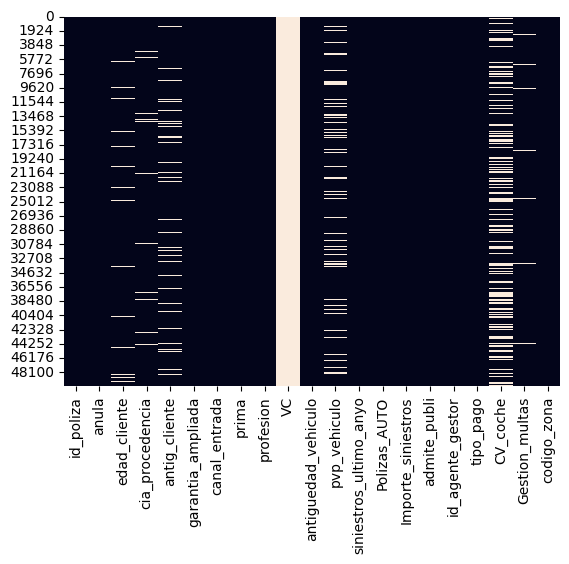

In [30]:
print("dimensiones: ", df_anulaciones.shape)

print("\nColumnas que contienen nulos y N de nulos por columna:")
print("N columnas con nulos: ", df_anulaciones.isna().sum()[df_anulaciones.isna().sum()>0].shape[0])
display(df_anulaciones.isna().sum()[df_anulaciones.isna().sum()>0])

sns.heatmap(df_anulaciones.isnull(), cbar=False)
plt.show()

# Desarrollo

## Data Cleaning

In [ ]:
# Copia de trabajo
df_anulaciones_clean = df_anulaciones.copy()

### Limpiar canal_entrada
- No estan bien escritos algunos nombres.
- - Output corregido: telefonico, oficina_adeslas, digital

In [ ]:
import utils.data_cleaning as dc

importlib.reload(dc)  # recarga el código editado
from utils.data_cleaning import clean_canal_entrada  # re-import actualizado

In [ ]:
# Aplicar limpieza
df_anulaciones_clean["canal_entrada_norm"], log = clean_canal_entrada(df["canal_entrada"])

In [ ]:
# Revisiones rápidas
display(log.head(10))
display(df_anulaciones_clean["canal_entrada_norm"].value_counts(dropna=False).head(10))

# Impacto en la tasa de anulación por canal
resumen = (
    df_anulaciones_clean.groupby("canal_entrada_norm", dropna=False)
      .agg(n=("anula", "size"), tasa_anula=("anula", "mean"))
      .assign(pct=lambda d: d["n"] / len(df_anulaciones_clean))
      .sort_values("n", ascending=False)
)
display(resumen.head(10))


,original,final,count
0,Telefonico,telefonico,23084
1,Oficina Adeslas,oficina_adeslas,20621
2,Telfonico,telefonico,4774
3,Digital,digital,1223
4,Oficina Adelsas,oficina_adeslas,297
5,,,1


canal_entrada_norm
telefonico         27858
oficina_adeslas    20918
digital             1223
<NA>                   1
Name: count, dtype: int64

,n,tasa_anula,pct
canal_entrada_norm,,,
telefonico,27858,0.020712,0.55716
oficina_adeslas,20918,0.018835,0.41836
digital,1223,0.024530,0.02446
NaN,1,0.000000,0.00002


In [ ]:

var_group = 'canal_entrada_norm'

print("Total")
n_total=df_anulaciones_clean.shape[0]
print("N:" , n_total)
print("N unicos:" , df_anulaciones_clean["id_poliza"].nunique())
print("\n" + "="*50 + "\n")

print("Target: ", var_target)
nulos = df_anulaciones_clean[var_target].isna().sum()
print(f"Nulos en {var_target}: {nulos}")
display(df_anulaciones_clean[var_target].value_counts())

print(f"\n% {var_target}: ",df_anulaciones_clean[var_target].mean())
print("\n" + "="*50 + "\n")


print("Agrupar target por ", var_group)
grouped = df_anulaciones_clean.groupby(var_group)

# Iterar sobre cada grupo
for name, group in grouped:
    print(f"{var_group}: {name}")
    print("Porcentaje del total: ", round((group.shape[0]/n_total)*100,2), "%")
    print(group[var_target].value_counts())
    print(f"\n% {var_target}: ", round(group[var_target].mean()*100,2), "%")
    print("\n" + "-"*50 + "\n")

Total
N: 50000
N unicos: 50000


Target:  anula
Nulos en anula: 0


anula
0    48999
1     1001
Name: count, dtype: int64


% anula:  0.02002


Agrupar target por  canal_entrada_norm
canal_entrada_norm: digital
Porcentaje del total:  2.45 %
anula
0    1193
1      30
Name: count, dtype: int64

% anula:  2.45 %

--------------------------------------------------

canal_entrada_norm: oficina_adeslas
Porcentaje del total:  41.84 %
anula
0    20524
1      394
Name: count, dtype: int64

% anula:  1.88 %

--------------------------------------------------

canal_entrada_norm: telefonico
Porcentaje del total:  55.72 %
anula
0    27281
1      577
Name: count, dtype: int64

% anula:  2.07 %

--------------------------------------------------

